In [1]:
import os,pandas as pd,numpy as np
from PIL import Image

In [2]:
os.listdir()

['asd.csv',
 'base11',
 'base12',
 'base13',
 'base14',
 'base15',
 'base16',
 'base17',
 'base18',
 'base19',
 'base20',
 'base21',
 'binary',
 'Copy of Annotation_Base13.csv',
 'datas.ipynb',
 'diagnostics-11-01385-v2.pdf',
 'groundtruths.csv',
 'messidor.bib',
 'messidor.json',
 'resized messidor']

In [3]:
df = pd.read_csv('labels.csv',encoding='latin-1')
df.head()

,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema
0,20051021_51625_0100_PP.tif,Service Ophtalmologie Lariboisière,3,0
1,20051021_51748_0100_PP.tif,Service Ophtalmologie Lariboisière,3,1
2,20051021_51804_0100_PP.tif,Service Ophtalmologie Lariboisière,3,1
3,20051021_51936_0100_PP.tif,Service Ophtalmologie Lariboisière,0,0
4,20051021_51994_0100_PP.tif,Service Ophtalmologie Lariboisière,0,0


In [4]:
df['Retinopathy grade'].value_counts()

0    546
3    254
2    247
1    153
Name: Retinopathy grade, dtype: int64

array([[<AxesSubplot:title={'center':'Retinopathy grade'}>,
        <AxesSubplot:title={'center':'Risk of macular edema '}>]],
      dtype=object)

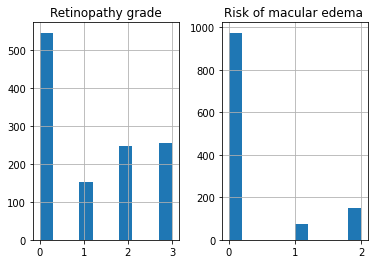

In [5]:
df.hist()

In [6]:
details = {k:v for k,v in zip(df['Image name'],df['Retinopathy grade'])}
len(details)

1200

In [10]:
count1488 = 0
count960 = 0
count1536 = 0
count = 0
for folder in os.listdir():
    if folder.startswith('base'):
        for image in os.listdir(folder):
            if image.endswith('.tif'):
                count+=1       
                x = Image.open(folder+'/'+image)
                y = np.asarray(x)
                if y.shape == (1488,2240,3):
                    count1488+=1
                if y.shape == (960,1440,3):
                    count960+=1
                    
                if y.shape == (1536,2304,3):
                    count1536+=1
                    
                # img = img.resize((256,256))
                # if details[image]==0:
                #     img.save(f'binary/0/{image}',format='TIFF')
                # else:
                #     img.save(f'binary/1/{image}',format='TIFF')
print(count,count1536+ count960 + count1488,count1536+ count960 + count1488 == count)
print('(1488,2240,3)',count1488)
print('(960,1440,3)',count960)
print('(1536,2304,3)',count1536)

1200 1200 True
(1488,2240,3) 400
(960,1440,3) 588
(1536,2304,3) 212


Multiclass to binary classification switching

In [ ]:
count=0
for folder in os.listdir():
    if folder.startswith('base'):
        for image in os.listdir(folder):
            if image.endswith('.tif'):
                count+=1
                x = Image.open(folder+'/'+image)
                y = np.asarray(x)
                if y.shape == (1488,2240,3):
                    img = Image.fromarray(y[:,400:1820])
                if y.shape == (960,1440,3):
                    img = Image.fromarray(y[:,250:1220])
                if y.shape == (1536,2304,3):
                    img = Image.fromarray(y[:,400:1950])
                img = img.resize((256,256))
                if details[image]==0:
                    img.save(f'binary/0/{image}',format='TIFF')
                else:
                    img.save(f'binary/1/{image}',format='TIFF')
                print(count)

In [13]:
ans = 0
for i in os.listdir('binary/0'):
    ans += details[i]
ans

0

In [14]:
dr = 0
for j in os.listdir('binary/1'):
    dr += details[j]
dr

1219